In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


2022-04-18 11:27:45.130969: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-18 11:27:45.189660: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-18 11:27:45.267006: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-18 11:27:45.267998: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

# Importing dataset and configuring paths
Zip and upload the modified recommended dataset (see README.md for more info).

In [2]:
train_image_path  = '/kaggle/input/cod10k/COD10K-v2/Train/Images' 
train_labels_path = '/kaggle/input/cod10k/COD10K-v2/Train/GT_Objects'

test_image_path   = '/kaggle/input/cod10k/COD10K-v2/Test/Images'
test_labels_path  = '/kaggle/input/cod10k/COD10K-v2/Test/GT_Objects'

# Importing DataLoader and Model classes

In [3]:
import sys
PROJECT_FOLDER = '/kaggle/input/cod-project/COD_Project/'
sys.path.insert(0,PROJECT_FOLDER+'src/')

In [4]:
from DataLoader import DataLoader
from Model import SINetModel

In [5]:
SEARCH_ATTENTION = ''  # v1' or 'v2'           else defaults to None ## But 'v2' Recommended
LOSS = 'bce'   # 'bce' or 'bce_logits' else defaults to tf.nn.sigmoid_cross_entropy_with_logits
USE_GENERATOR = True

# Creating Dataloader

In [6]:
# If use_generator = True then put hyper_batch_size = 20 and the batch size during the training is irrelevant (Recommended to avoid OOM errors)
# else put hyper_batch_size = 3500 (if this gives you OOM, lower it)
dl = DataLoader(train_image_path, train_labels_path, test_image_path, test_labels_path, use_generator=USE_GENERATOR, hyper_batch_size=20)

# Training Model

In [7]:
model = SINetModel(dl, search_attention=SEARCH_ATTENTION, resnet_weights="/kaggle/working/resnet.h5")

2022-04-18 09:56:28.607178: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-18 09:56:28.608352: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-18 09:56:28.609211: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-18 09:56:28.610377: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-18 09:56:28.611254: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Weights before loading from ResNet50 =  []
Loading ResNet weights to our model ...
Weights after loading from ResNet50 =  []
Weights have not changed so Loading failed
We will train our model from scratch then ...


In [8]:
# Note that batch_size is irrelevent if the model's Dataloader's use_generator is set to True
# If that's the case, batch size is defaulted to the model's Dataloader's hyper_batch_size
h = model.train(save_weigths='/kaggle/working/SINet_weights_search_att='+SEARCH_ATTENTION+'.h5', batch_size=4, epochs=40, loss=LOSS)

Loading train data ...
Found 6000 images belonging to 1 classes.
Found 6000 images belonging to 1 classes.
Training model ...


2022-04-18 09:57:03.652278: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1115136000 exceeds 10% of free system memory.
2022-04-18 09:57:05.199326: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1115136000 exceeds 10% of free system memory.
2022-04-18 09:57:06.290174: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40


2022-04-18 09:57:38.386124: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


188/188 [==============================] - 86s 274ms/step - loss: 1.3143 - SM_loss: 0.6355 - IM_loss: 0.6788 - val_loss: 0.7188 - val_SM_loss: 0.3444 - val_IM_loss: 0.3745
Epoch 2/40
188/188 [==============================] - 43s 231ms/step - loss: 1.0238 - SM_loss: 0.4970 - IM_loss: 0.5268 - val_loss: 0.6305 - val_SM_loss: 0.3040 - val_IM_loss: 0.3265
Epoch 3/40
188/188 [==============================] - 45s 238ms/step - loss: 0.8836 - SM_loss: 0.4315 - IM_loss: 0.4521 - val_loss: 0.5918 - val_SM_loss: 0.2943 - val_IM_loss: 0.2975
Epoch 4/40
188/188 [==============================] - 44s 233ms/step - loss: 0.9381 - SM_loss: 0.4678 - IM_loss: 0.4704 - val_loss: 1.2091 - val_SM_loss: 0.5598 - val_IM_loss: 0.6493
Epoch 5/40
188/188 [==============================] - 44s 232ms/step - loss: 0.8744 - SM_loss: 0.4429 - IM_loss: 0.4315 - val_loss: 0.9282 - val_SM_loss: 0.3774 - val_IM_loss: 0.5509
Epoch 6/40
188/188 [==============================] - 44s 233ms/step - loss: 0.8295 - SM_loss: 0

# Testing model

Plotting history of total loss with respect to epochs ...
Plotting history of total loss with respect to batches ...


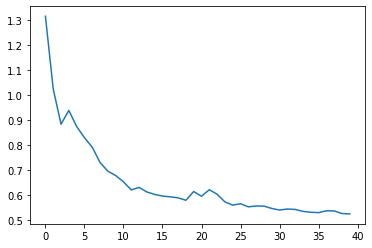

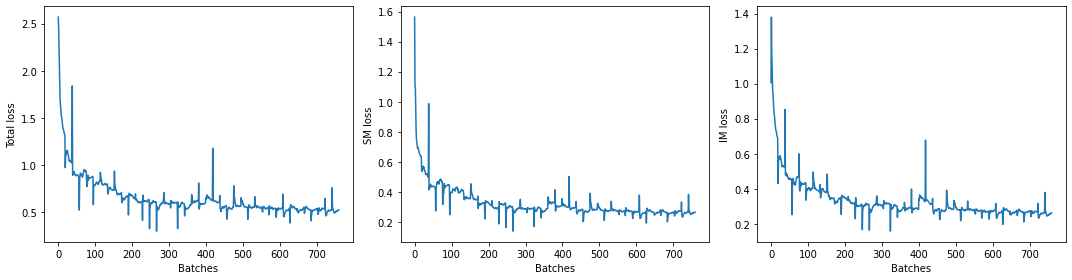

In [9]:
model.plot(h)

Testing model visually ...


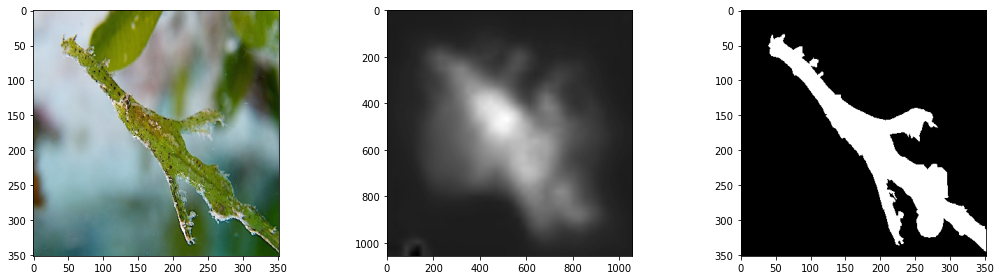

In [14]:
model.test('train')

Testing model visually ...


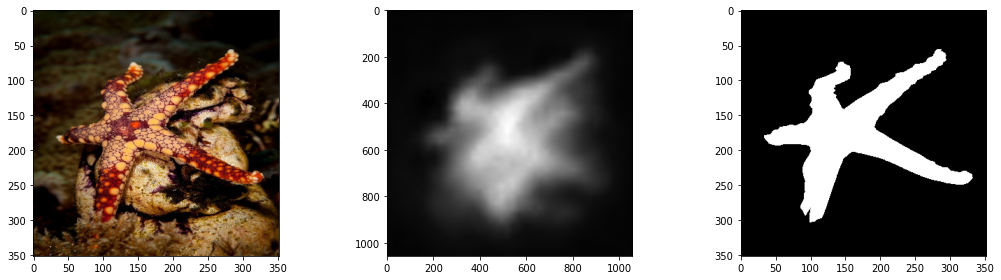

In [22]:
model.test('valid')

Sometimes model behaves wrongly after first training, If so, retrain for a dozen epochs (40, 20, 10). It converges eventually as shown in the report. We think this behaviors is due to different training batches or random weight initialization. 

You can execute the cells below to download and test our best model during this project.

# Testing already trained model

In [6]:
!pip install gdown

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14775 sha256=25c4a1734f7dfe99df3d5eea8ce71114b2e9bab99b47e3df7a6cd79298c1c2da
  Stored in directory: /root/.cache/pip/wheels/fb/c3/0e/c4d8ff8bfcb0461afff199471449f642179b74968c15b7a69c
Successfully built gdown


In [7]:
!gdown --fuzzy 'https://drive.google.com/file/d/1TGgwjVN02OrZc9NUBdFK0byXc6x8G7ff/view?usp=sharing'

Downloading...
From: https://drive.google.com/uc?id=1TGgwjVN02OrZc9NUBdFK0byXc6x8G7ff
To: /kaggle/working/SINet_weights_search_att=v2.h5
100%|████████████████████████████████████████| 592M/592M [00:49<00:00, 12.0MB/s]


In [8]:
dl = DataLoader(train_image_path, train_labels_path, test_image_path, test_labels_path, use_generator=True, hyper_batch_size=20)

In [9]:
model2 = SINetModel(dl, weights_path='/kaggle/working/SINet_weights_search_att=v2.h5', search_attention='')

2022-04-18 11:29:26.697195: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-18 11:29:26.698039: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-18 11:29:26.698666: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-18 11:29:26.699523: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-18 11:29:26.700162: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Testing model visually ...


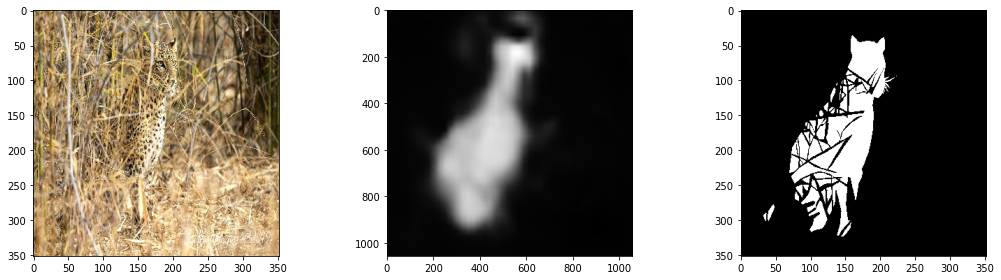

In [14]:
model2.test('train')

Testing model visually ...


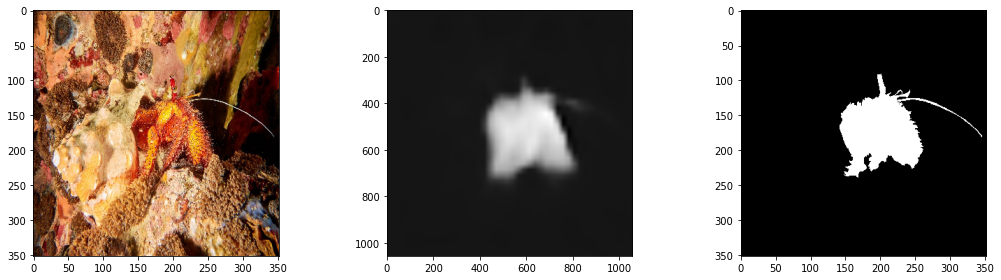

In [21]:
model2.test('valid')

Testing model visually ...


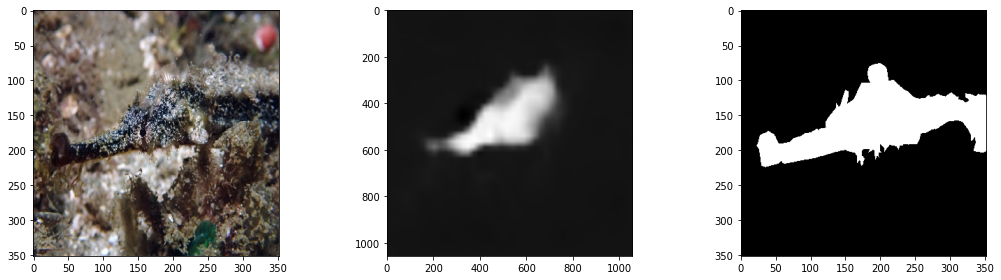

In [20]:
model2.test('test')